# MORTALITY PREDICTION

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
SEED = 42

In [4]:
# For replicability purposes
tf.random.set_seed(SEED)

# 1- Loading Data

In [5]:
TRAIN_SET_PATH = os.path.join('..', 'datasets', 'mort_pred_train.csv')
TEST_SET_PATH = os.path.join('..', 'datasets', 'mort_pred_test.csv')

In [6]:
train_df = pd.read_csv(TRAIN_SET_PATH, index_col=None)
test_df = pd.read_csv(TEST_SET_PATH, index_col=None)

In [7]:
train_df.shape, test_df.shape

((2475, 16), (207, 16))

# 2 - Data Preprocessing

## Feature Scaling

In [8]:
num_cols = ['EDAD', 'DIAS_SINTOMAS']

In [9]:
# Feature scaling parameters are learned only from the training set...
scaler = MinMaxScaler().fit(train_df[num_cols])
# ...but are used to scale both training and testing sets
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

Let's take on last look at our data in order to detect any inconsistencies.

In [10]:
train_df.head(3)

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,FALLECIDO
0,1,0,0,0.370370,0,0,0,0,0,0,0,0,0,0,0.000000,0
1,0,0,0,0.333333,0,0,0,0,0,0,0,0,0,0,0.083333,0
2,1,0,0,0.379630,0,0,0,0,0,0,0,1,0,0,0.000000,0


In [11]:
train_df.tail(3)

,SEXO,PAC_HOSPITALIZADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DIAS_SINTOMAS,FALLECIDO
2472,1,1,1,0.750000,0,1,0,0,0,1,0,0,0,0,0.000000,1
2473,0,1,1,0.314815,0,0,0,0,0,0,0,0,0,0,0.027778,1
2474,1,1,0,0.407407,0,0,0,0,0,0,0,0,0,0,0.083333,1


The recently scaledn features are within the [0, 1] range, and all the other features are binary in nature, so we're ready to proceed with next stage of this notebook.

## Preparing Data

In [12]:
# Features and labels for the training set
X_tr, y_tr = train_df.drop(['FALLECIDO'], axis='columns', inplace=False), train_df['FALLECIDO']
# Features and labels for the testing set
X_ts, y_ts = test_df.drop(['FALLECIDO'], axis='columns', inplace=False), test_df['FALLECIDO']

# 3 - Model Training

In [13]:
input_shape = X_tr.shape[1]
input_shape

15

## Neural Network Architecture

In [14]:
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[input_shape]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Training

In [15]:
history = model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
62/62 [==============================] - 7s 64ms/step - loss: 0.6703 - accuracy: 0.6838 - val_loss: 0.7118 - val_accuracy: 0.4545
Epoch 2/10
62/62 [==============================] - 1s 17ms/step - loss: 0.6141 - accuracy: 0.7980 - val_loss: 0.6487 - val_accuracy: 0.7091
Epoch 3/10
62/62 [==============================] - 1s 18ms/step - loss: 0.5564 - accuracy: 0.9086 - val_loss: 0.5805 - val_accuracy: 0.8707
Epoch 4/10
62/62 [==============================] - 1s 13ms/step - loss: 0.4921 - accuracy: 0.9576 - val_loss: 0.5058 - val_accuracy: 0.9414
Epoch 5/10
62/62 [==============================] - 1s 8ms/step - loss: 0.4222 - accuracy: 0.9677 - val_loss: 0.4136 - val_accuracy: 0.9697
Epoch 6/10
62/62 [==============================] - 1s 11ms/step - loss: 0.3517 - accuracy: 0.9732 - val_loss: 0.3301 - val_accuracy: 0.9758
Epoch 7/10
62/62 [==============================] - 1s 12ms/step - loss: 0.2877 - accuracy: 0.9768 - val_loss: 0.2594 - val_accuracy: 0.9838
Epoch 8/10
62/

In [16]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.670339,0.683838,0.711817,0.454545
1,0.614137,0.797980,0.648700,0.709091
2,0.556405,0.908586,0.580501,0.870707
3,0.492128,0.957576,0.505788,0.941414
4,0.422241,0.967677,0.413571,0.969697
5,0.351683,0.973232,0.330144,0.975758
6,0.287699,0.976768,0.259429,0.983838
7,0.235358,0.977778,0.208443,0.989899
8,0.195531,0.977778,0.168637,0.989899
9,0.166169,0.978788,0.141580,0.989899


### Saving Model and Training Results

In [17]:
RESULTS_FOLDER_PATH = os.path.join('..', 'results')

In [18]:
MODEL_PATH = os.path.join(RESULTS_FOLDER_PATH, 'mort-pred-nn')
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: ..\results\mort-pred-nn\assets


INFO:tensorflow:Assets written to: ..\results\mort-pred-nn\assets


In [19]:
RESULTS_FILE_PATH = os.path.join(RESULTS_FOLDER_PATH, 'mort-pred-tr-results.csv')
history_df.to_csv(RESULTS_FILE_PATH)

## Learning Curves

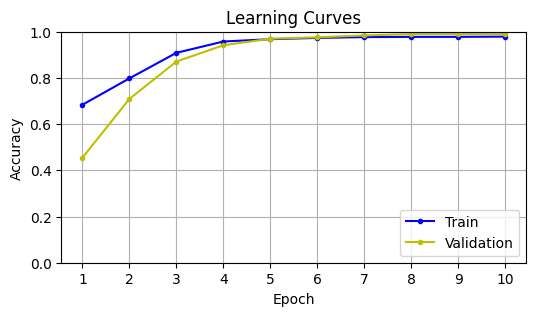

In [20]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], 'b.-', label='Train')
plt.plot(history.history['val_accuracy'], 'y.-', label='Validation')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.xticks(range(0, 10), range(1, 11))
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# 4 - Model Evaluation

## Metrics and Confussion Matrix

In [21]:
from sklearn.metrics import classification_report as clfn_rep
from sklearn.metrics import confusion_matrix as conf_mx

In [22]:
probs = model.predict(X_ts)

7/7 [==============================] - 1s 4ms/step


### Using a 50% Classification Threshold

In [23]:
preds_50 = np.where(probs > 0.5, 1, 0)

In [24]:
results_50 = clfn_rep(y_ts, preds_50, target_names=['Not Deceased', 'Deceased'])
print(results_50)

              precision    recall  f1-score   support

Not Deceased       0.99      0.96      0.97       121
    Deceased       0.94      0.99      0.97        86

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



In [25]:
def conf_mx_df(y_true, y_pred, target_names):
    mx = conf_mx(y_ts, preds_50)
    tuples_index = [('TRUE CLASSES', name) for name in target_names]
    tuples_columns = [('PREDICTED CLASSES', name) for name in target_names]
    index = pd.MultiIndex.from_tuples(tuples_index)
    columns = pd.MultiIndex.from_tuples(tuples_columns)
    return pd.DataFrame(mx, index=index, columns=columns)

In [26]:
conf_mx_df(y_ts, preds_50, ['Not Deceased', 'Deceased'])

PREDICTED CLASSES         
                               Not Deceased Deceased
TRUE CLASSES Not Deceased               116        5
             Deceased                     1       85